In [ ]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
import copy
import matplotlib.pyplot as plt

In [ ]:
class SOM():
    def __init__(self, n, n_clusters=841, mapping='linear', a=2, r = 0):
        self.n_ = n
        self.n_clt_ = n_clusters
        self.a_ = a
        self.r_ = r
        self.init_W()
        self.init_mapping(mapping)
    
    def init_W(self):
        self.W = np.random.normal(size=(self.n_clt_, self.n_), scale=100)
        self.old_W = copy.deepcopy(self.W)* float('inf')

    def init_mapping(self, name):
        if name == 'linear': self.mapping = self.linear_mapping
        elif name == 'square': self.mapping = self.square_mapping
        else:
            raise NameError()

    def update_W(self, x, mask):
        for i, m in enumerate(mask):
            self.W[i, :] += (self.a_ * (x - self.W[i, :])) * m

    def argmin_dist(self, x):
        dist = np.linalg.norm(self.W - x, axis=1)
        return np.argmin(dist)

    def linear_mapping(self, j, r):
        mask = np.zeros((self.n_clt_,))
        for i in range(max(0, j-r), min(self.n_clt_, j+r+1)):
            mask[i] = 1
        return mask

    def square_mapping(self, j, r):
        n2 = int(np.sqrt(self.n_clt_))
        mask = np.zeros((n2, n2))
        ji = int(j/n2)
        jj = j %(n2)
        mask[max(0, ji-r):min(n2, ji+r+1), max(0, jj-r):min(n2, jj+r+1)] = 1
        mask = mask.flatten()
        return mask
    
    def schedule(self, g=0.9, d=1):
        # self.r_ = max(0, self.r_-d)
        self.a_ *= g

    def update_old_W(self):
        self.old_W = copy.deepcopy(self.W)

    def stop_cond(self, epoch, errs, verbos=True):
        err = np.sum(np.sum(np.power(self.old_W - self.W, 2)))
        errs.append(err)
        if verbos:
            print(f'epoch:{epoch} - err:{err}')
        if err < 1:
            return True
        return False

    def predict(self, xs):
        pred = {}
        for x in xs:
            j = self.argmin_dist(x)
            if j in pred:
                pred[j] += 1
            else:
                pred[j] =1
        return pred

    def plot_centers(self, pred):
        temp = []
        for i in pred:
            temp.append((i, pred[i]))
        temp.sort(key=lambda x: x[1])
        temp2 = temp[-20 :]
        plt.figure(figsize=(10, 10))
        for i, tup in enumerate(temp2):
            plt.subplot(4, 5, i+1)
            plt.imshow(self.W[tup[0], :].reshape(28, 28))
            plt.title(f'clt {tup[0]}({tup[1]})')
            plt.axis('off')
        plt.show()


    def __call__(self, xs, err, verbos=True):
        epoch = 0
        while not self.stop_cond(epoch, err, verbos):
            self.update_old_W()
            for x in xs:
                j = self.argmin_dist(x)
                mask = self.mapping(j, self.r_)
                self.update_W(x, mask)
            self.schedule()
            epoch += 1

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
xs = x_train[0:1000].reshape(-1, 28*28)
ys = y_train[0:1000]

In [ ]:
def plot_loss(err, name):
    plt.plot(err)
    plt.grid()
    plt.title(name)
    plt.xlabel('epoch')
    plt.ylabel('loss')

## part 1: r = 0

In [ ]:
net1 = SOM(xs.shape[1])
err1 = []

In [ ]:
net1(xs, err1)

epoch:0 - err:inf
epoch:1 - err:16490155333.609259
epoch:2 - err:4223623135.16066
epoch:3 - err:2123115033.9805326
epoch:4 - err:1348867020.0243104
epoch:5 - err:895503996.6747478
epoch:6 - err:685665730.278494
epoch:7 - err:443026048.85744125
epoch:8 - err:294984253.3469624
epoch:9 - err:176395703.3337449
epoch:10 - err:214820390.97359538
epoch:11 - err:137552893.50015727
epoch:12 - err:117457378.25091726
epoch:13 - err:97463065.34427375
epoch:14 - err:55122697.47323016
epoch:15 - err:64092574.6207888
epoch:16 - err:49187745.13625965
epoch:17 - err:26787750.294940908
epoch:18 - err:11343426.490076734
epoch:19 - err:9935536.650285741
epoch:20 - err:5691921.326720065
epoch:21 - err:2573506.4091411456
epoch:22 - err:2427236.2041650414
epoch:23 - err:262345.3768836304
epoch:24 - err:323414.5915762036
epoch:25 - err:215436.73882081808
epoch:26 - err:66581.90122542772
epoch:27 - err:132723.42568575192
epoch:28 - err:18545.905293763724
epoch:29 - err:36881.71339237913
epoch:30 - err:32068.28

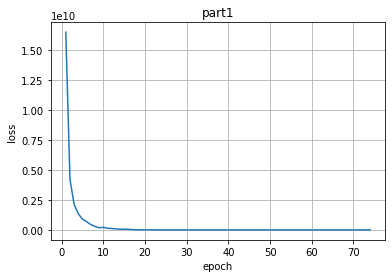

In [ ]:
plot_loss(err1, 'part1')

Text(0, 0.5, 'freq')

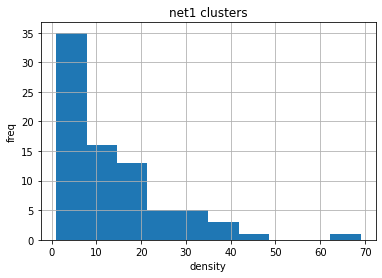

In [ ]:
pred = net1.predict(xs)
plt.hist(pred.values())
plt.grid()
plt.title('net1 clusters')
plt.xlabel('density')
plt.ylabel('freq')

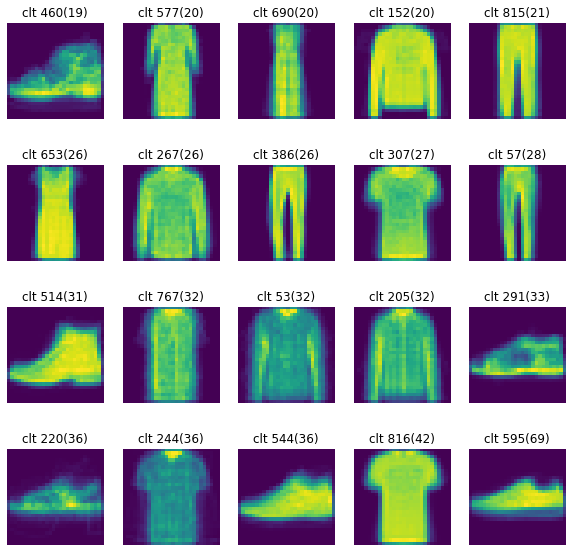

In [ ]:
net1.plot_centers(pred)

## part 2: R=1 linear

In [ ]:
net2 = SOM(xs.shape[1], r=1)
err2 = []

In [212]:
net2(xs, err2)

epoch:0 - err:inf
epoch:1 - err:45766094050.0334
epoch:2 - err:14542317343.623869
epoch:3 - err:6819144771.118734
epoch:4 - err:6691862509.507702
epoch:5 - err:5653545829.595555
epoch:6 - err:4747578639.00946
epoch:7 - err:4628964290.725079
epoch:8 - err:3480766665.6014957
epoch:9 - err:2846037024.6749654
epoch:10 - err:1875002610.7282634
epoch:11 - err:1125363018.555287
epoch:12 - err:851219178.6440151
epoch:13 - err:653604961.177642
epoch:14 - err:461425080.11792004
epoch:15 - err:222877261.09677362
epoch:16 - err:151468860.19916388
epoch:17 - err:106604052.20637871
epoch:18 - err:63668521.07658487
epoch:19 - err:42014502.27462704
epoch:20 - err:18785757.909920577
epoch:21 - err:13954842.358023223
epoch:22 - err:16390500.59643013
epoch:23 - err:9214350.495150639
epoch:24 - err:7813401.406006487
epoch:25 - err:4814060.494023783
epoch:26 - err:4657402.24187352
epoch:27 - err:4760236.3525772905
epoch:28 - err:3798713.7911916533
epoch:29 - err:2406508.5670674825
epoch:30 - err:2324381.32

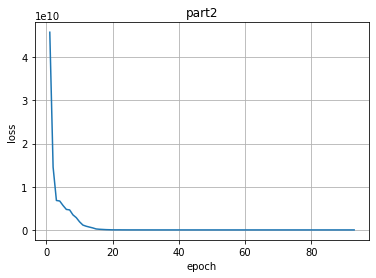

In [213]:
plot_loss(err2, 'part2')

Text(0, 0.5, 'freq')

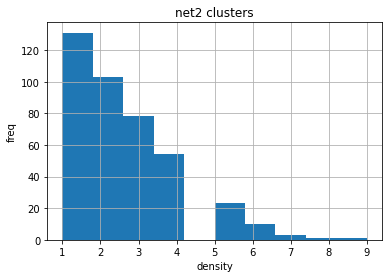

In [214]:
pred = net2.predict(xs)
plt.hist(pred.values())
plt.grid()
plt.title('net2 clusters')
plt.xlabel('density')
plt.ylabel('freq')

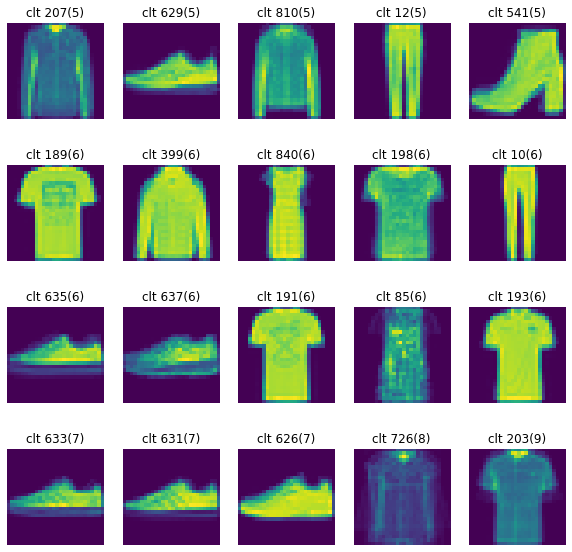

In [215]:
net2.plot_centers(pred)

## R=1 , square

In [216]:
net3 = SOM(xs.shape[1], r=1, mapping='square')
err3 = []

In [217]:
net3(xs, err3)

epoch:0 - err:inf
epoch:1 - err:108059859938.80782
epoch:2 - err:47667477996.59023
epoch:3 - err:27698333074.91313
epoch:4 - err:27156552053.83738
epoch:5 - err:18222310518.290676
epoch:6 - err:19322753911.229614
epoch:7 - err:19166572617.89947
epoch:8 - err:8443456216.317644
epoch:9 - err:4510151483.726526
epoch:10 - err:3316891109.7641597
epoch:11 - err:2531666597.8019757
epoch:12 - err:1902449113.2055767
epoch:13 - err:1607819864.7141736
epoch:14 - err:1082057252.2399144
epoch:15 - err:902960618.1087979
epoch:16 - err:626670676.1777198
epoch:17 - err:437680818.55536634
epoch:18 - err:235880991.53037307
epoch:19 - err:171802637.95149785
epoch:20 - err:115844246.93889421
epoch:21 - err:69768393.98606211
epoch:22 - err:45104266.4818628
epoch:23 - err:21217767.11930628
epoch:24 - err:11039484.672573114
epoch:25 - err:8038935.853394352
epoch:26 - err:4591999.020100112
epoch:27 - err:4418454.75906405
epoch:28 - err:2858879.5756884417
epoch:29 - err:2636942.8587746886
epoch:30 - err:245867

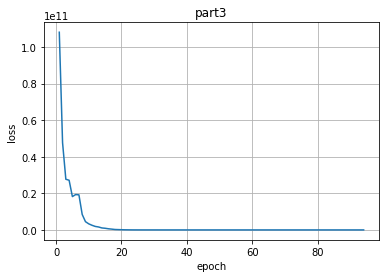

In [218]:
plot_loss(err3, 'part3')

Text(0, 0.5, 'freq')

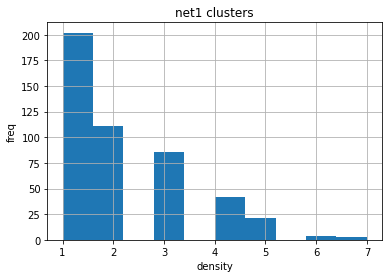

In [219]:
pred = net3.predict(xs)
plt.hist(pred.values())
plt.grid()
plt.title('net1 clusters')
plt.xlabel('density')
plt.ylabel('freq')

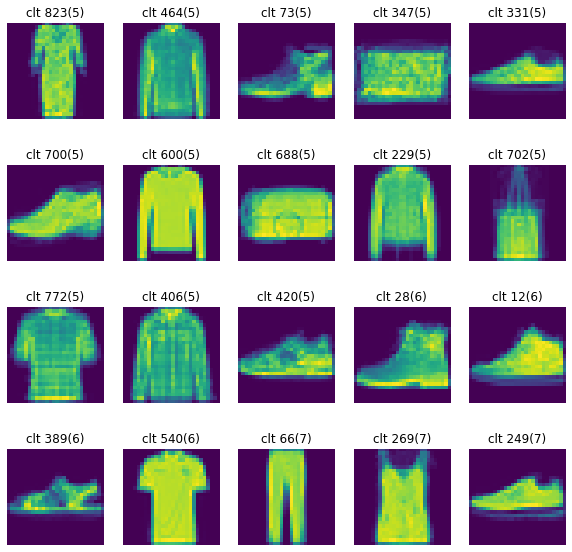

In [220]:
net3.plot_centers(pred)